In [1]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210403_across_core_noise'

db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/' \
            'batch_across_core_noise_210403/'

data_script = 'batch_across_core_noise_210403'

db = {}
db['data'] = compress_pickle.load(
    db_path+f'{data_script}_scaleup_0.3_512_10.gz')
db['global_random'] = compress_pickle.load(
    db_path+f'{data_script}_global_random_0.3_512_10.gz')
db['naive_random_21'] = compress_pickle.load(
    db_path+f'{data_script}_naive_random_21_0.3_512_10.gz')
db['naive_random_17'] = compress_pickle.load(
    db_path+f'{data_script}_naive_random_17_0.3_512_10.gz')


Height: 7.518796992481203, Aspect: 1.33


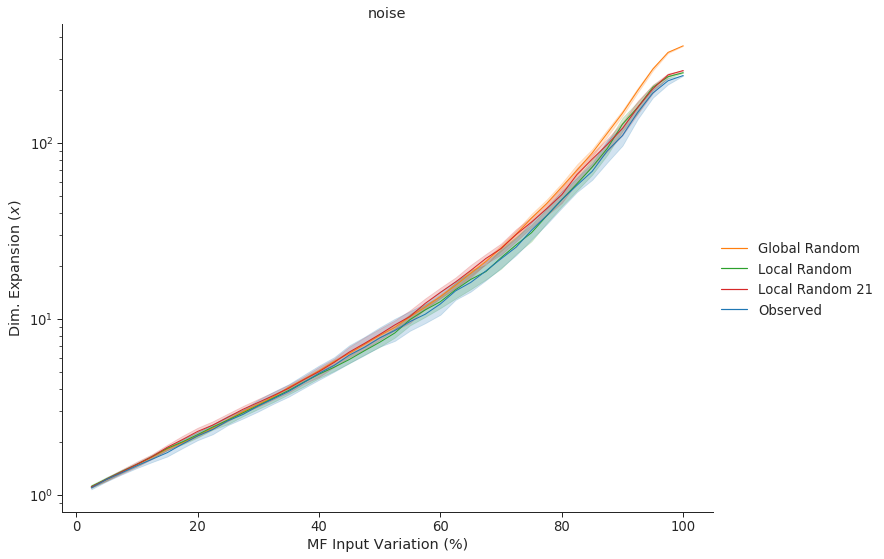

In [2]:

name_map = {
        'data': "Observed",
        'global_random': "Global Random",
        'naive_random_17': "Local Random",
        'naive_random_21': "Local Random 21",
}

palette = {
    name_map['data']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['naive_random_17']: sns.color_palette()[2],
    name_map['naive_random_21']: sns.color_palette()[3],
}


mpd = MyPlotData()
ress_ref = db['naive_random_17'][0][0]
resss_ref2 = db['global_random'][0]
for model_name in [
        'global_random',
        'naive_random_17',
        'naive_random_21',
        'data',
        ]:
    ress = db[model_name]
#     print(ress)
    ress_tries = ress[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
    #         print(noise)
            res = ress[noise]
            res_ref = ress_ref[noise]
            res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/res_ref2['grc_dim'],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


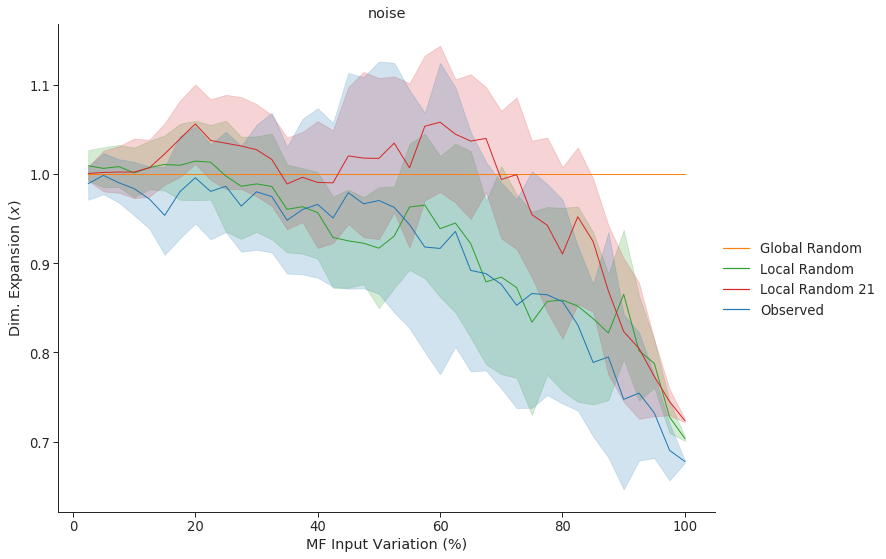

In [3]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


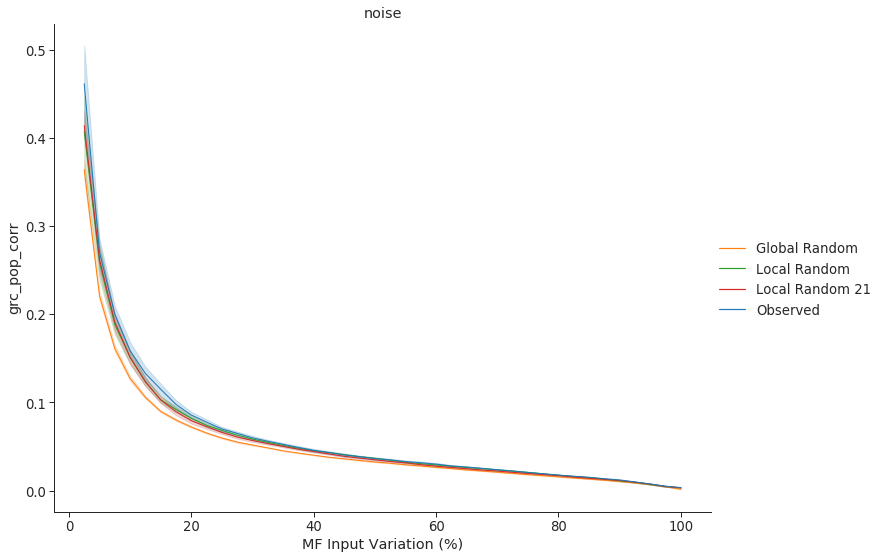

In [4]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='grc_pop_corr',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


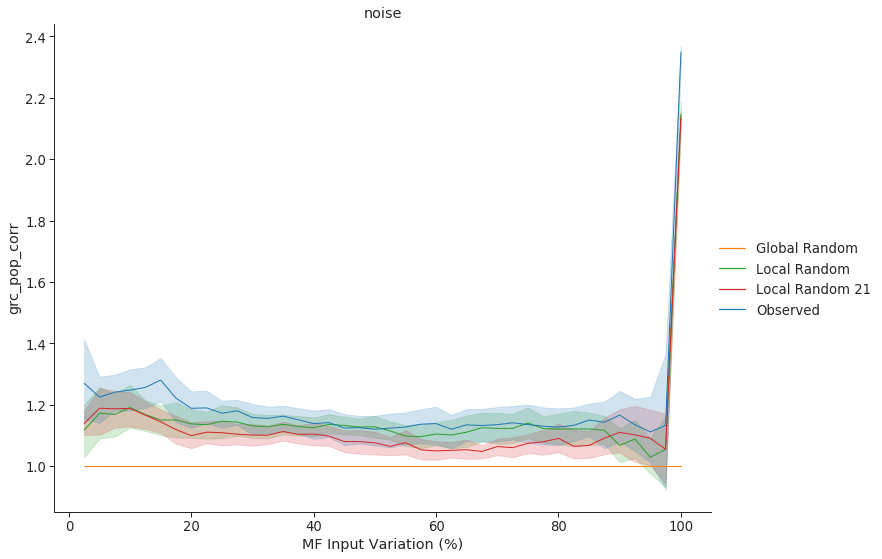

In [5]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr_norm',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='grc_pop_corr',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


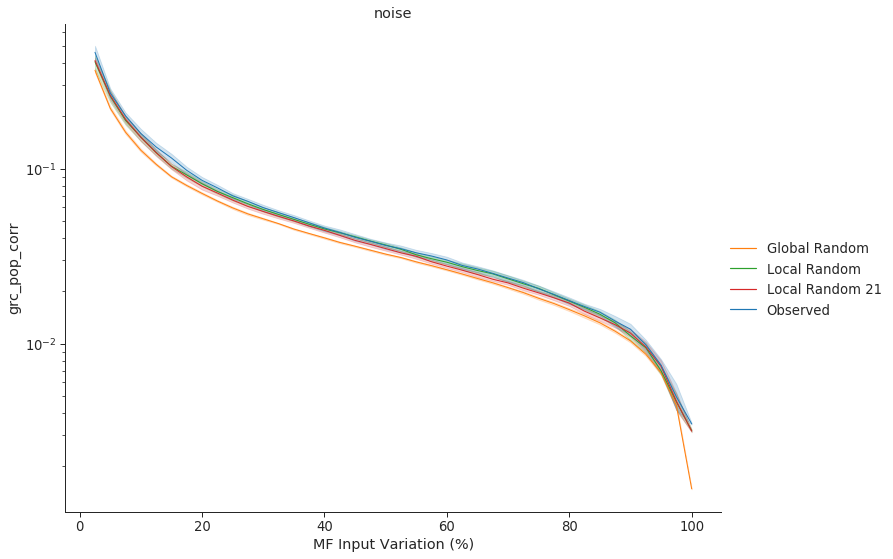

In [6]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='grc_pop_corr',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


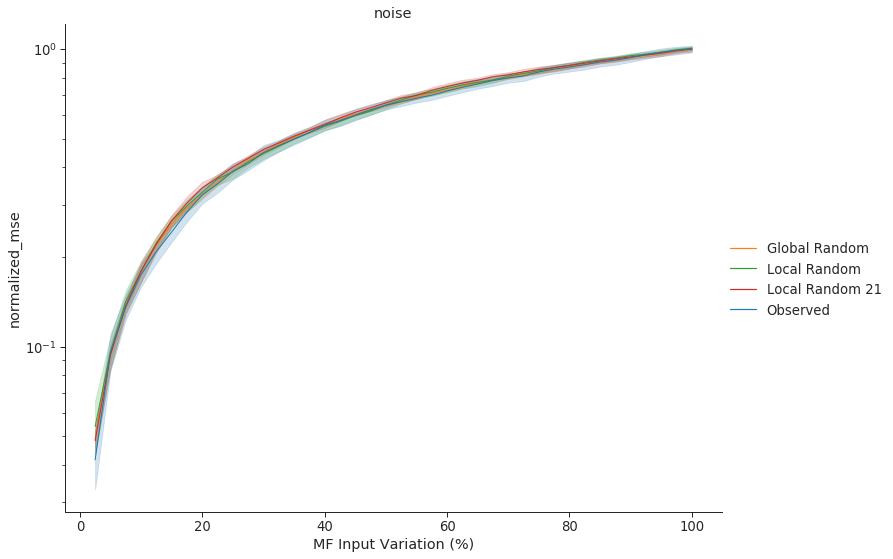

In [7]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='normalized_mse',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='normalized_mse',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


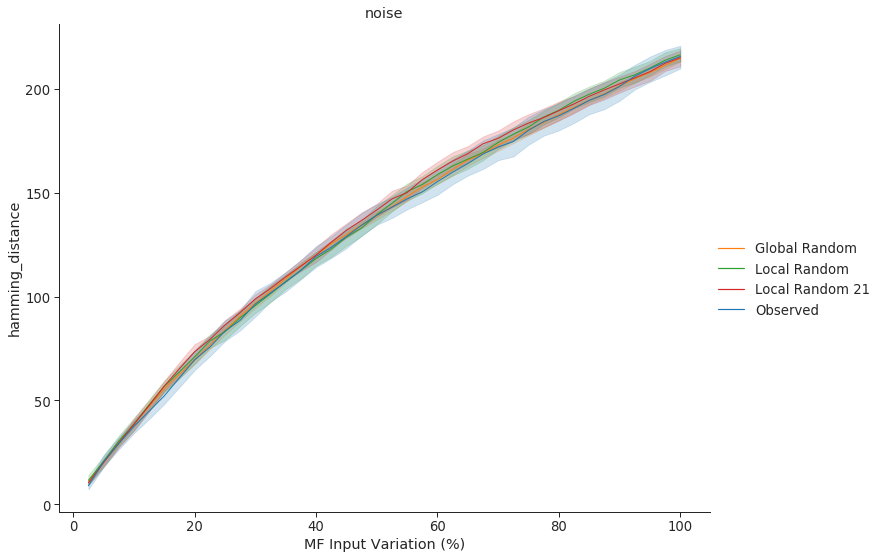

In [8]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='hamming_distance',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='hamming_distance',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


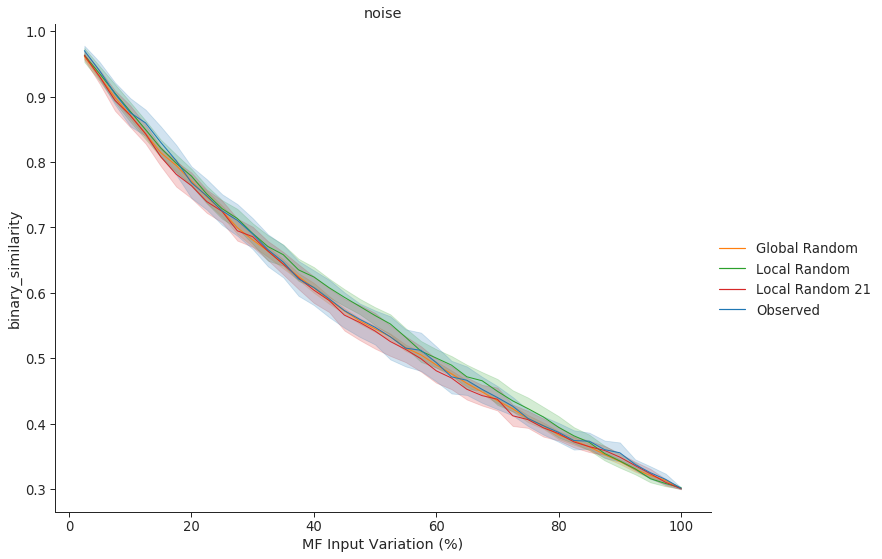

In [9]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='binary_similarity',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=10,
#     ylim=[0, None],
    y_axis_label='binary_similarity',
    x_axis_label='MF Input Variation (%)',
    title='noise',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )
